In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
df.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
df.shape

(21, 2)

In [11]:
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

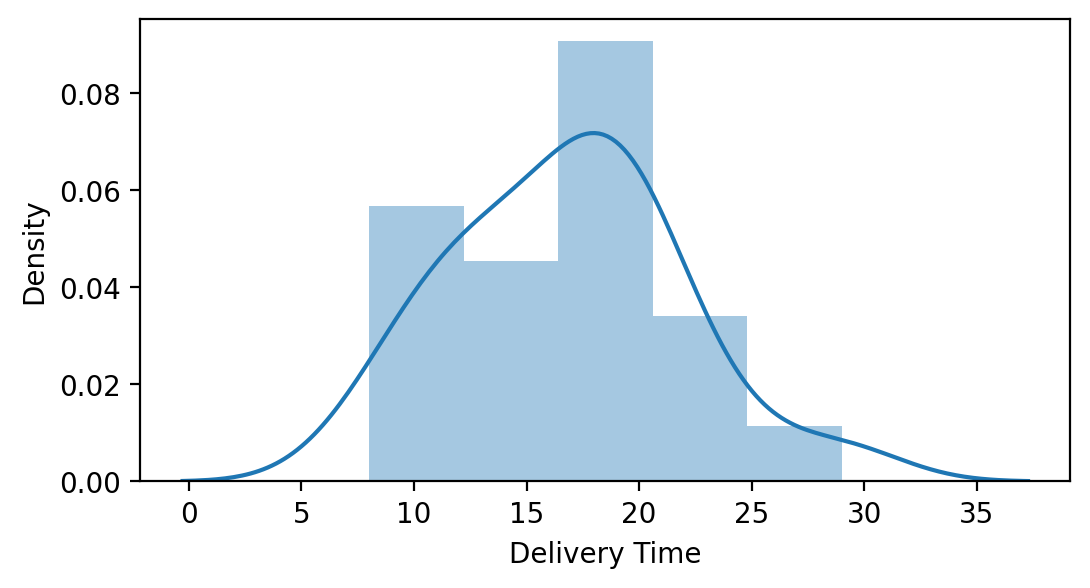

In [12]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

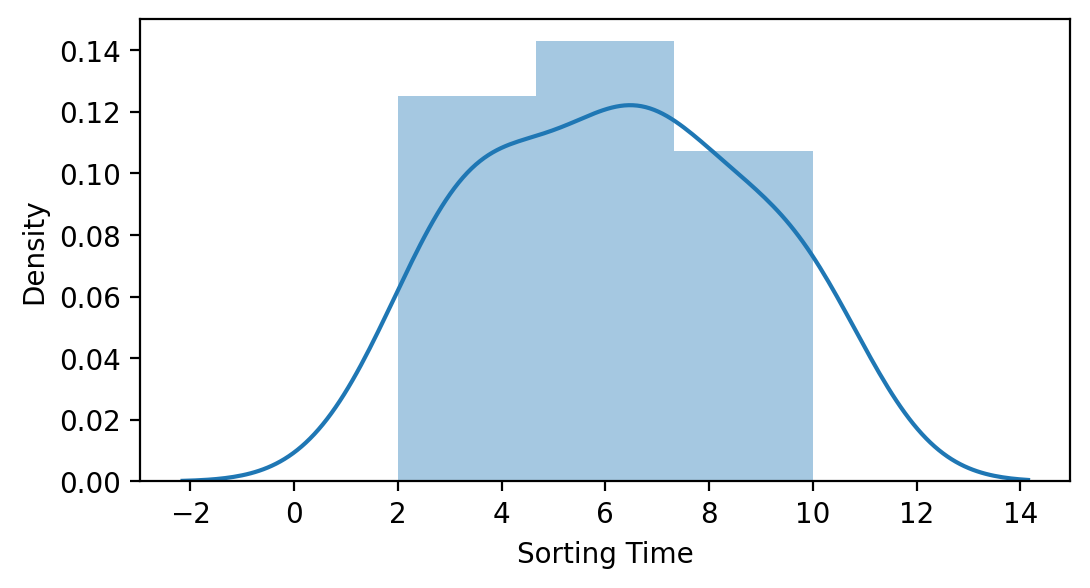

In [13]:
sns.distplot(df['Sorting Time'])

# Correlation Between Variables

In [14]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Delivery Time'], df['Sorting Time'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.826


In [15]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df['Delivery Time'], df['Sorting Time'])
print('Spearmanr correlation: %.3f' % corr)

Spearmanr correlation: 0.806


In [16]:
x = df.filter(['Delivery Time'])
x

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [17]:
y = df.filter(['Sorting Time'])
y

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [18]:
x = df['Delivery Time'].values.reshape(-1,1)
x

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [19]:
y = df['Sorting Time'].values.reshape(-1,1)
y

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=44)

In [22]:
predict_reg = LinearRegression()

In [23]:
predict_reg.fit(x_train, y_train)

LinearRegression()

In [24]:
print('Intercept value of model is ', predict_reg.intercept_)
print('Coefficient value of model is ', predict_reg.coef_)

Intercept value of model is  [-0.36921197]
Coefficient value of model is  [[0.39693725]]


In [25]:
y_pred = predict_reg.predict(x_test)

In [26]:
nw1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
nw1

,Actual,Predict
0,4,5.537214
1,3,4.405943
2,9,7.073361
3,6,7.470299
4,6,5.723775


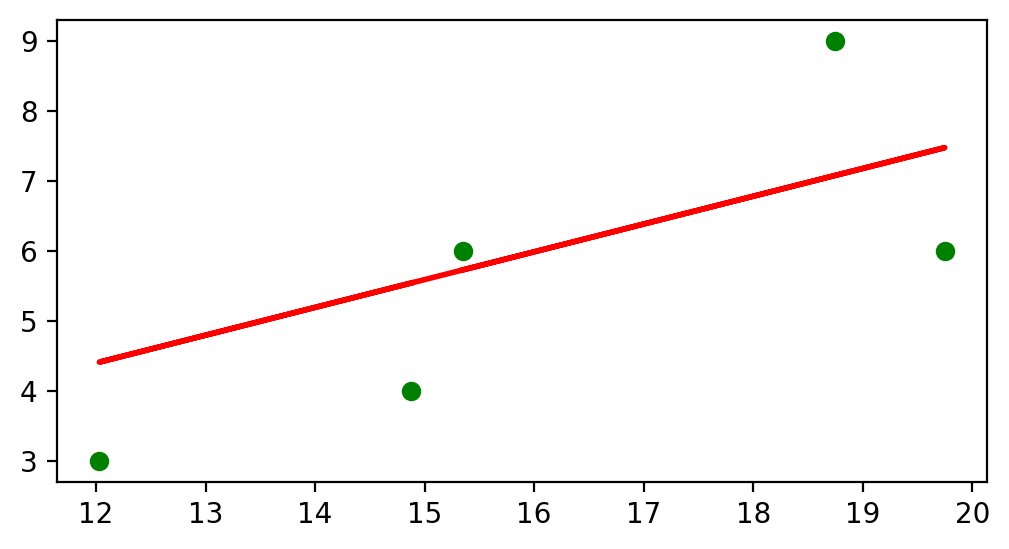

In [27]:
plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, y_pred, color='r', linewidth=2)

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.3232639790329146
Mean Squared Error: 2.057943739447182
Root Mean Squared Error: 1.4345534982868997
R^2 Score: 0.51463591050774


# Log Transformation

In [29]:
x_log = np.log(df['Delivery Time'].values.reshape(-1,1))

In [30]:
y_log = df['Sorting Time'].values.reshape(-1,1)

In [31]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=44)

In [32]:
y_pred_log = LinearRegression()

In [33]:
y_pred_log.fit(x_train_log, y_train_log)

LinearRegression()

In [34]:
print('Intercept value of model is ', y_pred_log.intercept_)
print('Coefficient value of log model is ', y_pred_log.coef_)

Intercept value of model is  [-11.69000679]
Coefficient value of log model is  [[6.50439938]]


In [35]:
linear_model= y_pred_log.predict(x_test_log)
linear_model

array([[5.8719888 ],
       [4.48905919],
       [7.37564803],
       [7.71361493],
       [6.074259  ]])

In [36]:
nw = pd.DataFrame({'Actual':y_test_log.flatten(), 'Predict': linear_model.flatten()})
nw

,Actual,Predict
0,4,5.871989
1,3,4.489059
2,9,7.375648
3,6,7.713615
4,6,6.074259


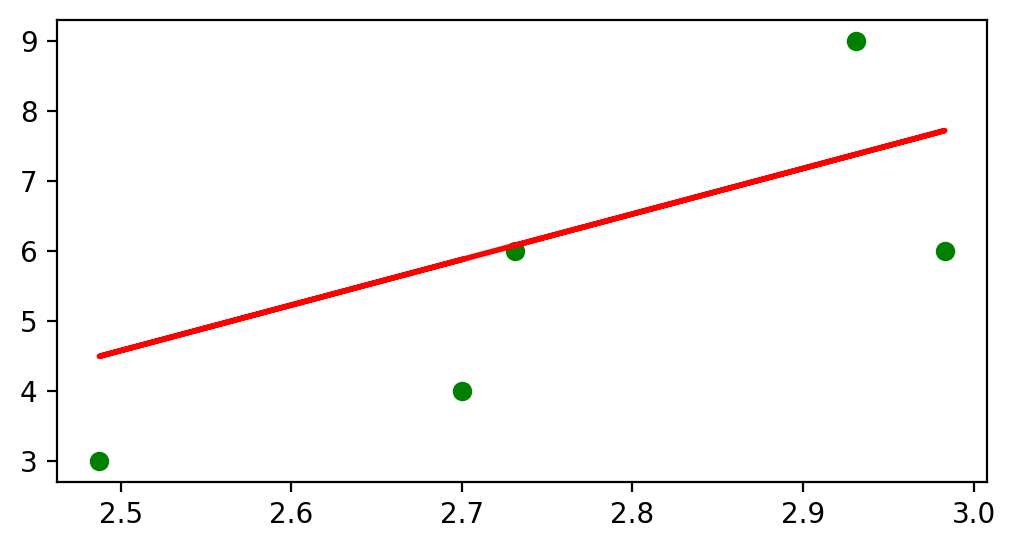

In [37]:
plt.scatter(x_test_log, y_test_log, color='g')
plt.plot(x_test_log, linear_model, color='r', linewidth=2)

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_log, linear_model))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_log, linear_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_log, linear_model)))
print('R^2 Score:', metrics.r2_score(y_test_log, linear_model))

Mean Absolute Error: 1.354654777190634
Mean Squared Error: 2.2604298335755226
Root Mean Squared Error: 1.503472591561124
R^2 Score: 0.466879756232188


# Exponential Transformation

In [39]:
x_e_log = df['Delivery Time'].values.reshape(-1,1)

In [40]:
y_e_log = np.log(df['Sorting Time'].values.reshape(-1,1))

In [41]:
x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(x_e_log, y_e_log, test_size=0.2, random_state=44)

In [42]:
exp_model = LinearRegression()
exp_model.fit(x_train_exp, y_train_exp)

LinearRegression()

In [43]:
print('Exponent Model Intercept value is ', exp_model.intercept_)
print('Exponent Model Coefficient value is', exp_model.coef_)

Exponent Model Intercept value is  [0.50072916]
Exponent Model Coefficient value is [[0.07364559]]


In [44]:
exp_model_pred = exp_model.predict(x_test_exp)
exp_model_pred

array([[1.59657552],
       [1.38668559],
       [1.88158395],
       [1.95522954],
       [1.63118895]])

In [45]:
nw1 = pd.DataFrame({'Actual':y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
nw1

,Actual,Predict
0,1.386294,1.596576
1,1.098612,1.386686
2,2.197225,1.881584
3,1.791759,1.955230
4,1.791759,1.631189


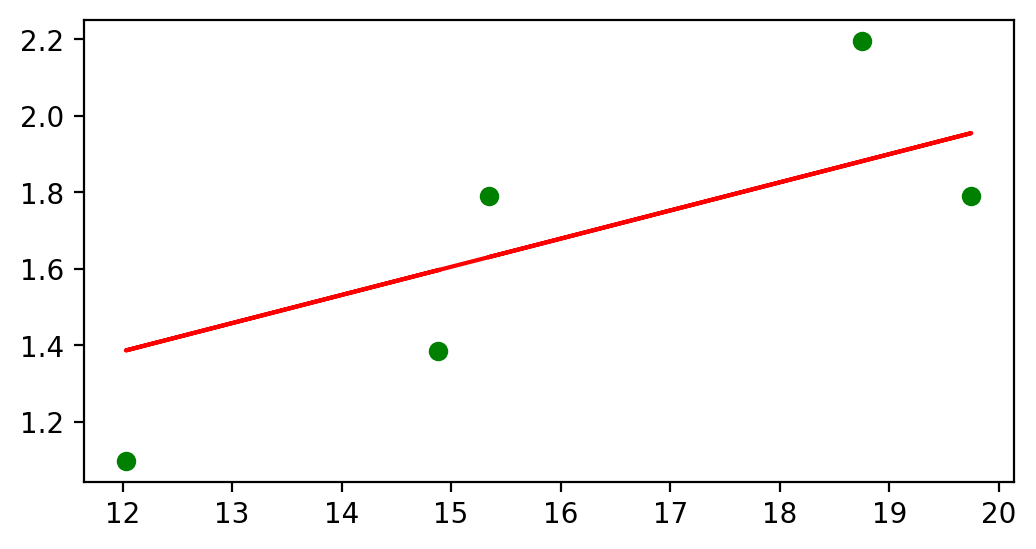

In [46]:
plt.scatter(x_test_exp, y_test_exp, color='g')
plt.plot(x_test_exp, exp_model_pred, color='r')

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_exp, exp_model_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_exp, exp_model_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_exp, exp_model_pred)))
print('R^2 Score:', metrics.r2_score(y_test_exp, exp_model_pred))

Mean Absolute Error: 0.22760713654591586
Mean Squared Error: 0.05586775141394832
Root Mean Squared Error: 0.23636360001901377
R^2 Score: 0.6083119047287381


In [48]:
# as per the transformation in the Model the Exponential transformation model turns out to be the best model.